# LSTM model - one hour step
### Predictions  for different window sizes

Libraries import

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
from different_functions import transform_and_split_data, LSTM_model, transform_and_split_data, make_predictions

CSV file reading

In [9]:
# Read the CSV file
all_data = pd.read_csv("data_for_main_model/data_ready_for_training.csv")
all_data.drop('Unnamed: 0',axis='columns', inplace=True)
all_data = all_data[["relh", "skph", "temp", "minutes"]]

In [10]:
all_data.head()

,relh,skph,temp,minutes
0,100.0,0.000,-2.0,0
1,100.0,0.000,-2.0,30
2,100.0,3.704,-2.0,0
3,100.0,0.000,-2.0,30
4,100.0,5.556,-3.0,0


In [11]:
# only full hours
all_data = all_data[all_data['minutes'] == 0]
all_data.drop('minutes',axis='columns', inplace=True)

MSE calculations for given window size and etc. for the next 1 to 12 hours

In [12]:
def return_time(window_size,test_size,valid_size,epochs,learning_rate, save_model = False):
    
    MSE_humid = []
    MAE_humid = []

    MSE_wind = []
    MAE_wind = []
    
    MSE_temp = []
    MAE_temp = []

    # MSE calculations for given window size and etc. in next 1 to 3 next hours
    # last_pred_hour == 3 means that predictions are from +1 hour till +3 hours
    last_pred_hour = 12
    for hour in range(last_pred_hour):
        # (hour == 1) it means that predictions will be made for next one hour
        X_train, y_train, X_val, y_val, X_test, y_test,training_mean, training_std = transform_and_split_data(all_data.copy(), window_size, test_size, valid_size, hour)
        X_test.size
        model = LSTM_model(X_train, y_train, X_val, y_val, epochs, learning_rate, window_size)

        ## save as binary file .pkl
        if(save_model):
            file_name = "lstm_" + str(hour+1) + ".pkl"
            with open(file_name, "xb") as f_1:
                pickle.dump(model, f_1, -1)

        pred, actaul = make_predictions(model, X_test, y_test,  training_mean, training_std)
        MSE_humid.append(mean_squared_error(actaul[0], pred[0]))
        MAE_humid.append(mean_absolute_error(actaul[0], pred[0]))
        MSE_wind.append(mean_squared_error(actaul[1], pred[1]))
        MAE_wind.append(mean_absolute_error(actaul[1], pred[1]))
        MSE_temp.append(mean_squared_error(actaul[2], pred[2]))
        MAE_temp.append(mean_absolute_error(actaul[2], pred[2]))


    return MSE_humid, MAE_humid, MSE_wind, MAE_wind, MSE_temp, MAE_temp, pred, actaul

In [13]:
test_size = 0.15
valid_size = 0.15
epochs = 12
learning_rate=0.001

window_size = 2
MSE_humid_2, MAE_humid_2, MSE_wind_2, MAE_wind_2, MSE_temp_2, MAE_temp_2, pred_2, actaul_2  = return_time(window_size,test_size,valid_size,epochs,learning_rate)
window_size = 4
MSE_humid_4, MAE_humid_4, MSE_wind_4, MAE_wind_4, MSE_temp_4, MAE_temp_4, pred_4, actaul_4  = return_time(window_size,test_size,valid_size,epochs,learning_rate)
window_size = 6
MSE_humid_6, MAE_humid_6, MSE_wind_6, MAE_wind_6, MSE_temp_6, MAE_temp_6, pred_6, actaul_6  = return_time(window_size,test_size,valid_size,epochs,learning_rate)
window_size = 8
MSE_humid_8, MAE_humid_8, MSE_wind_8, MAE_wind_8, MSE_temp_8, MAE_temp_8, pred_8, actaul_8  = return_time(window_size,test_size,valid_size,epochs,learning_rate)
window_size = 10
MSE_humid_10, MAE_humid_10, MSE_wind_10, MAE_wind_10, MSE_temp_10, MAE_temp_10, pred_10, actaul_10  = return_time(window_size,test_size,valid_size,epochs,learning_rate)
window_size = 12
MSE_humid_12, MAE_humid_12, MSE_wind_12, MAE_wind_12, MSE_temp_12, MAE_temp_12, pred_12, actaul_12  = return_time(window_size,test_size,valid_size,epochs,learning_rate)

Epoch 1/12
1577/1577 [==============================] - 8s 4ms/step - loss: 0.1472 - root_mean_squared_error: 0.3836 - val_loss: 0.1034 - val_root_mean_squared_error: 0.3216
Epoch 2/12
1577/1577 [==============================] - 5s 3ms/step - loss: 0.1156 - root_mean_squared_error: 0.3400 - val_loss: 0.1000 - val_root_mean_squared_error: 0.3162
Epoch 3/12
1577/1577 [==============================] - 6s 3ms/step - loss: 0.1125 - root_mean_squared_error: 0.3353 - val_loss: 0.0998 - val_root_mean_squared_error: 0.3160
Epoch 4/12
1577/1577 [==============================] - 5s 3ms/step - loss: 0.1115 - root_mean_squared_error: 0.3340 - val_loss: 0.0982 - val_root_mean_squared_error: 0.3134
Epoch 5/12
1577/1577 [==============================] - 6s 4ms/step - loss: 0.1109 - root_mean_squared_error: 0.3330 - val_loss: 0.0962 - val_root_mean_squared_error: 0.3102
Epoch 6/12
1577/1577 [==============================] - 6s 4ms/step - loss: 0.1108 - root_mean_squared_error: 0.3328 - val_loss: 0

## Results
"prediction for hour-1" means that for 0 on x axis prediction is for next 1 hour, etc.

Text(0, 0.5, 'MSE')

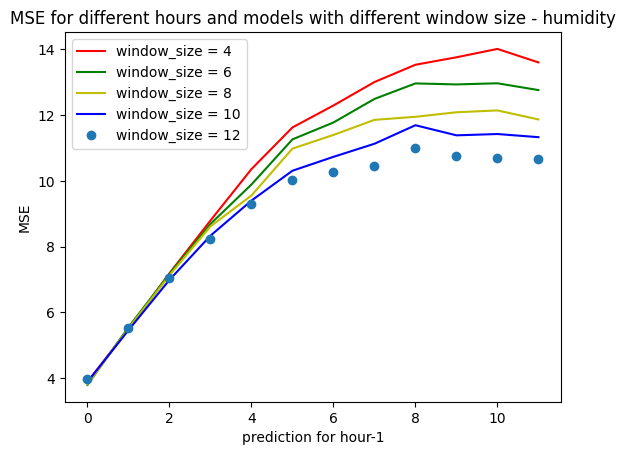

In [24]:
# remember! the first is useless
plt.plot(MAE_humid_4,'r', label='window_size = 4')#,MAE_humid_4,MAE_humid_6,MAE_humid_8,MAE_humid_10, MAE_humid_12])
plt.plot(MAE_humid_6,'g', label='window_size = 6')
plt.plot(MAE_humid_8,'y', label='window_size = 8')
plt.plot(MAE_humid_10,'b', label='window_size = 10')
plt.plot(MAE_humid_12,'o', label='window_size = 12')
plt.legend()
plt.title("MSE for different hours and models with different window size - humidity")
plt.xlabel("prediction for hour-1")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

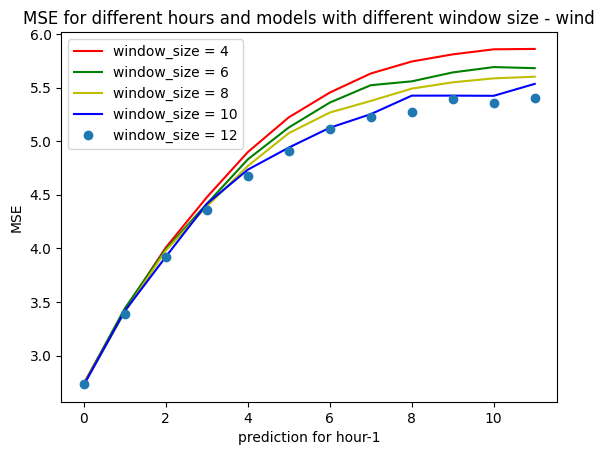

In [25]:
# remember! the first is useless
plt.plot(MAE_wind_4,'r', label='window_size = 4')#,MAE_humid_4,MAE_humid_6,MAE_humid_8,MAE_humid_10, MAE_humid_12])
plt.plot(MAE_wind_6,'g', label='window_size = 6')
plt.plot(MAE_wind_8,'y', label='window_size = 8')
plt.plot(MAE_wind_10,'b', label='window_size = 10')
plt.plot(MAE_wind_12,'o', label='window_size = 12')
plt.legend()
plt.title("MSE for different hours and models with different window size - wind")
plt.xlabel("prediction for hour-1")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

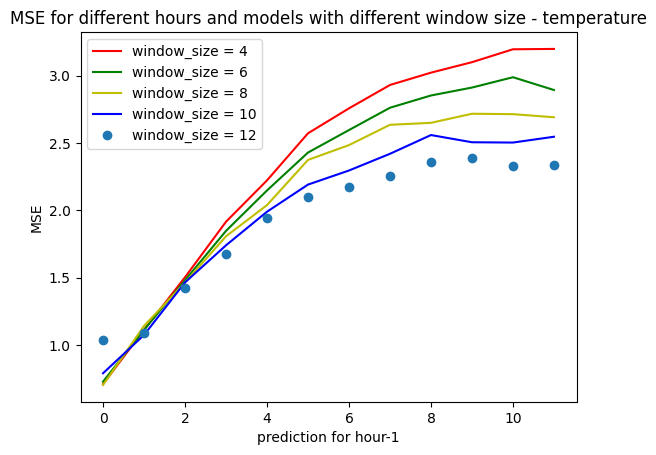

In [26]:
# remember! the first is useless
plt.plot(MAE_temp_4,'r', label='window_size = 4')#,MAE_humid_4,MAE_humid_6,MAE_humid_8,MAE_humid_10, MAE_humid_12])
plt.plot(MAE_temp_6,'g', label='window_size = 6')
plt.plot(MAE_temp_8,'y', label='window_size = 8')
plt.plot(MAE_temp_10,'b', label='window_size = 10')
plt.plot(MAE_temp_12,'o', label='window_size = 12')
plt.legend()
plt.title("MSE for different hours and models with different window size - temperature")
plt.xlabel("prediction for hour-1")
plt.ylabel("MSE")